<a href="https://colab.research.google.com/github/migel-cepele/ComputerVision/blob/main/ImageClassificationEx3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex.3 has the tasks and solutions, but it is just for ilustration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-3-2384df336243>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(ig)


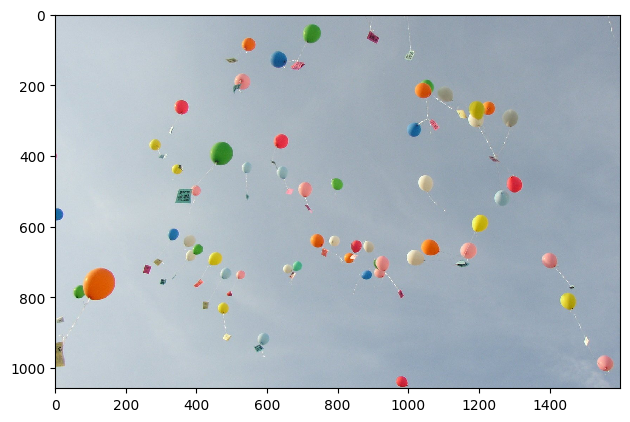

In [3]:
import skimage as sk

#load the image
ig = sk.io.imread('/content/drive/MyDrive/CV_Tirana-main/M3_Image Classification/baloons.jpg')
sk.io.imshow(ig)


<ipython-input-5-f7b832252479>:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(grayscale)


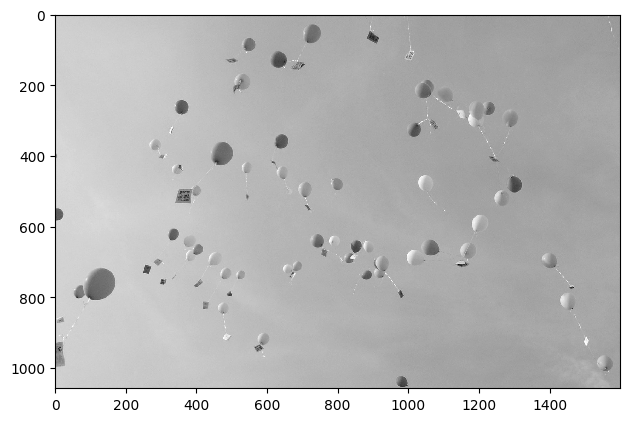

In [5]:
#convert from rgb to grayscale
from skimage.color import rgb2gray

grayscale = rgb2gray(ig)

sk.io.imshow(grayscale)



<ipython-input-6-ea70b43d8c8b>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(gamma_corrected)


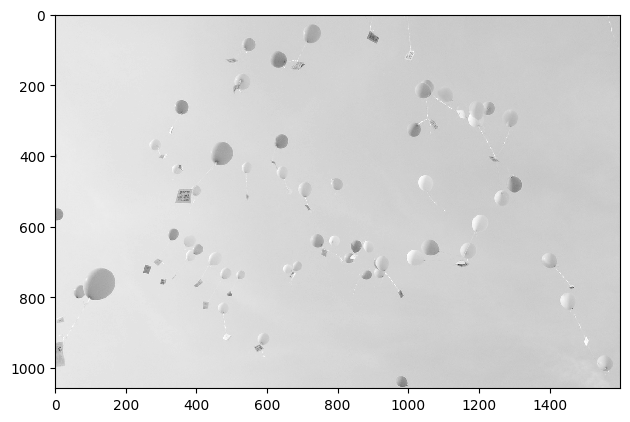

In [6]:
#3. Gamma correction with $\gamma=0.5$
from skimage import exposure

# Gamma
gamma_corrected = exposure.adjust_gamma(grayscale, 0.5)

sk.io.imshow(gamma_corrected)

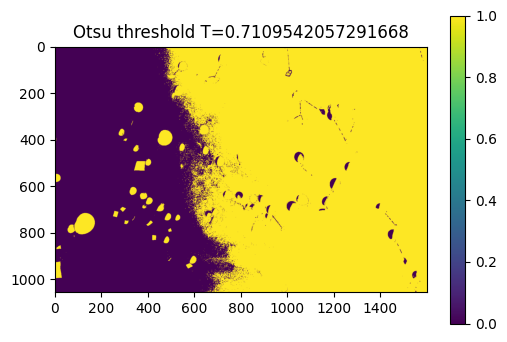

In [23]:
#4. Otsu threshold from grayscale (non gamma corrected)
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

thresh = threshold_otsu(grayscale)
binary = grayscale < thresh # we want to keep the lower values, because baloons have slightly darker colors than the background

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

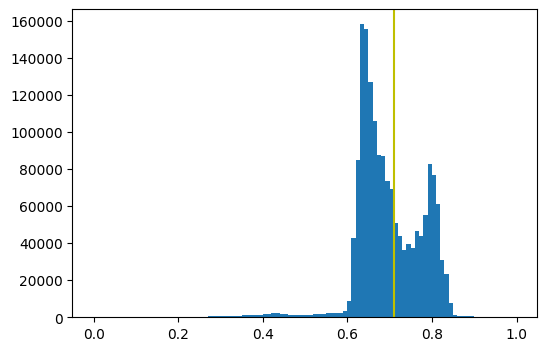

In [17]:
# visualization of the threshhold and image histogram of grayscale values
flat_data = grayscale.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[0,flat_data.max()])
plt.axvline(thresh,color='y')
plt.show()

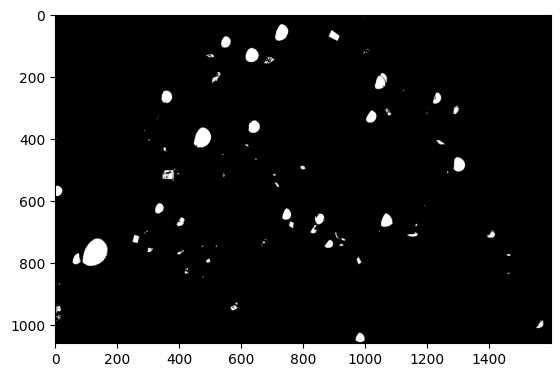

In [25]:
#5. Apply Otsu's threhold to gamma-corrected image
binary = gamma_corrected < thresh

plt.imshow(binary, cmap='gray')

no of regions is 177


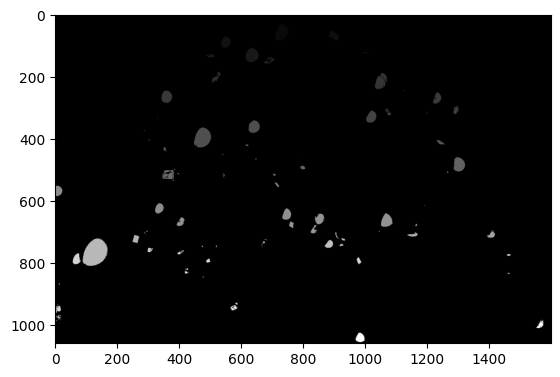

In [26]:
#6. label the objects
from skimage.measure import label


label_image, nregions = label(binary,return_num=True)
plt.imshow(label_image, cmap='gray')
print(f'no of regions is {nregions}')

In [27]:
#7. extract features area and eccentricity
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,28.0,0.964091
1,2,39.0,0.983702
2,3,4.0,1.000000
3,4,6.0,1.000000
4,5,3.0,1.000000


<Axes: xlabel='area', ylabel='eccentricity'>

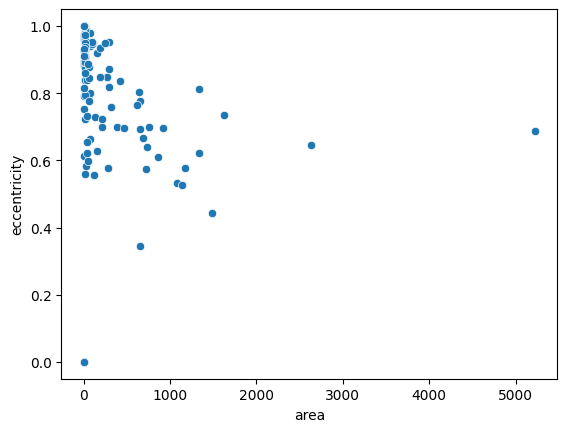

In [28]:
#plot features
import seaborn as sns

sns.scatterplot(x='area',y='eccentricity',data=df_features)

In [29]:
#8. Find balloons as objects with area higher than 500 and eccentricity lower than 0.8
df_balloons = df_features.loc[(df_features['area']>500) & (df_features['eccentricity']<0.8)]

df_balloons.head()
print('number of idenfitied balloons is {}'.format(df_balloons.shape[0]))

indx_balloons = df_balloons['label'].values
indx_balloons

number of idenfitied balloons is 18


array([  7,  11,  13,  17,  40,  47,  55,  56,  68,  77,  97,  98, 100,
       101, 102, 128, 146, 177])

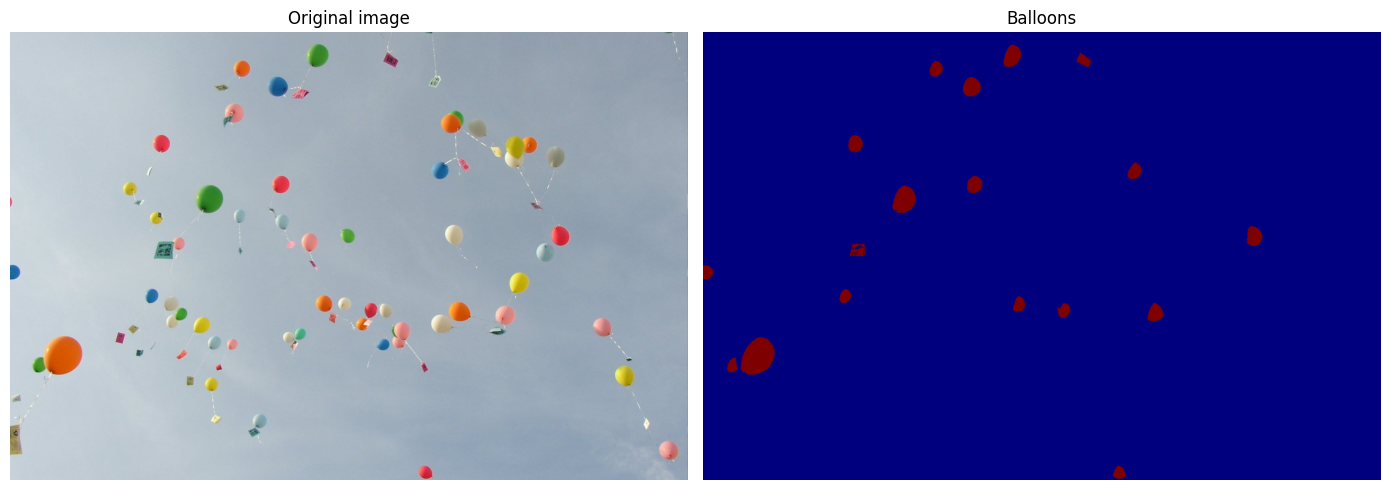

In [30]:
#9. plot these balloons and the original ones
# Get some figures:
fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(ig)
ax[0].set_title('Original image')

import numpy as np

mask_balloons = np.isin(label_image,indx_balloons)
ax[1].imshow(mask_balloons,cmap=plt.cm.jet)
ax[1].set_title('Balloons') # set figure title
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()